![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [32]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


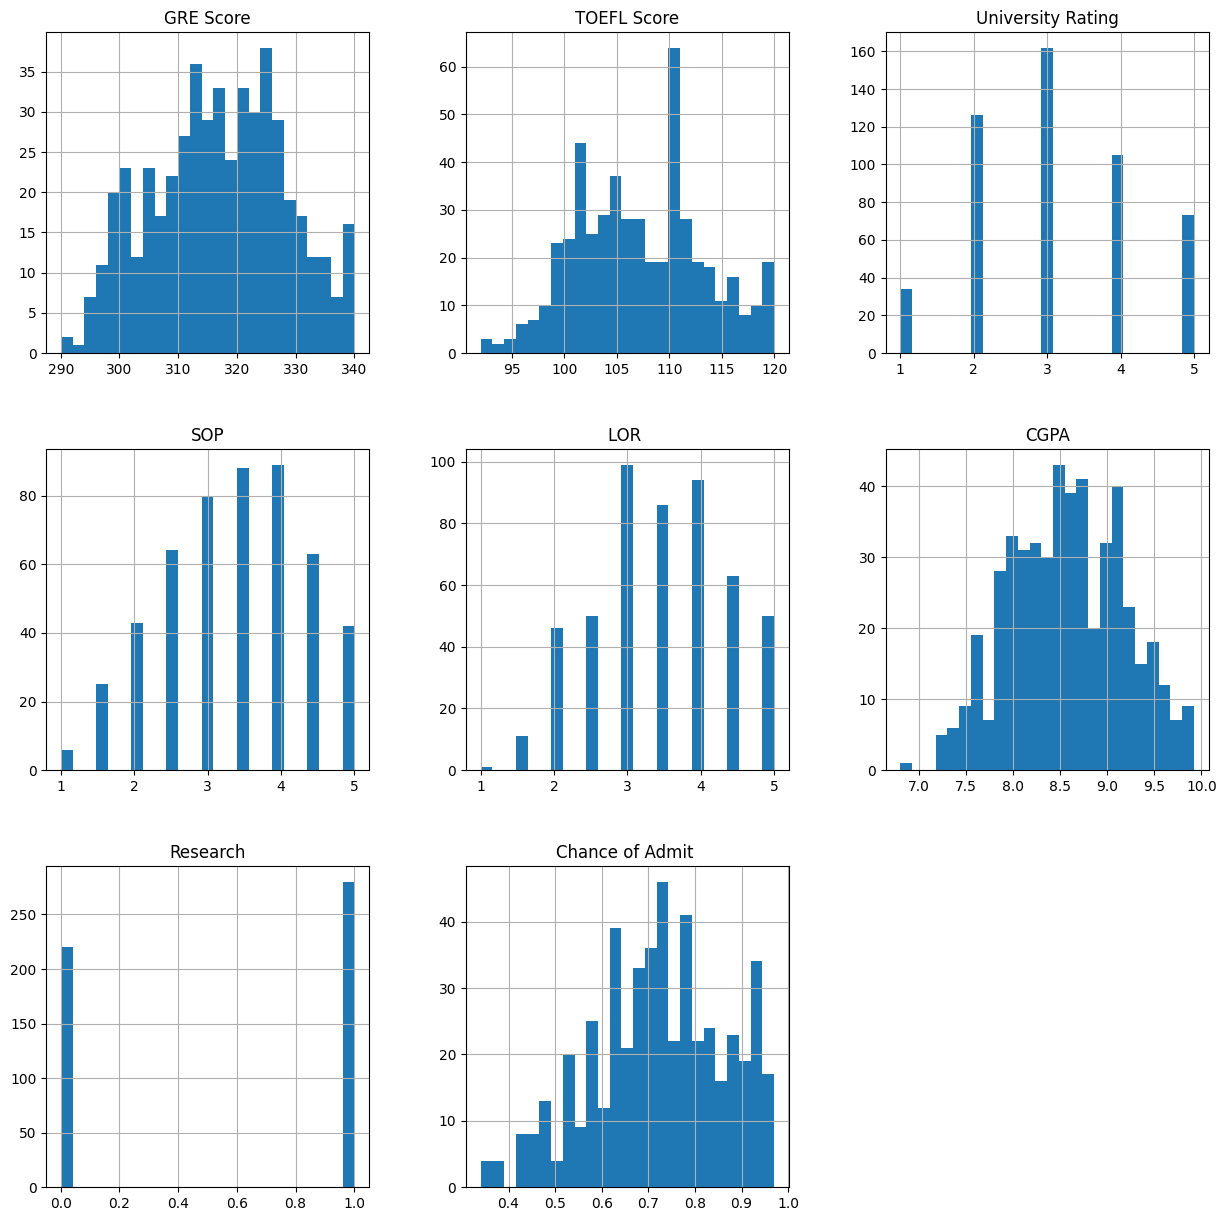

In [33]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [34]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [35]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

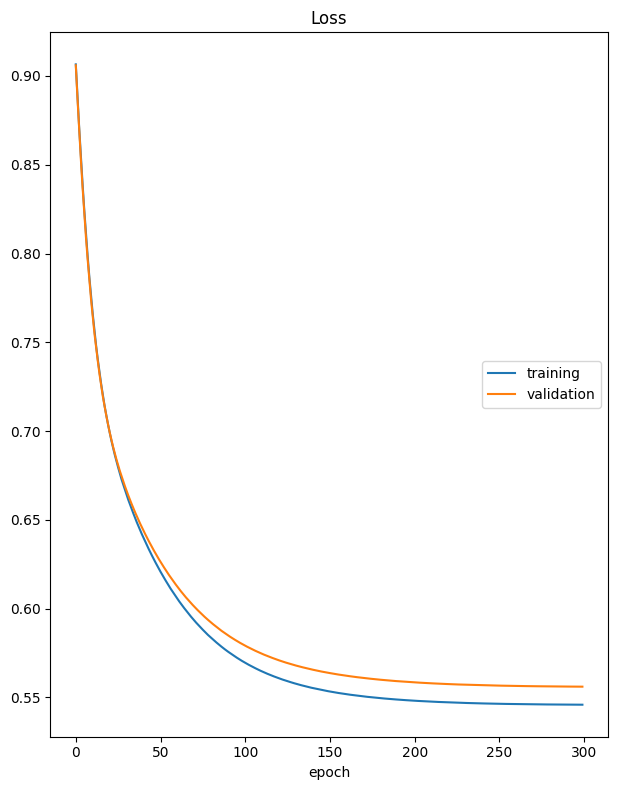

Loss
	training         	 (min:    0.546, max:    0.907, cur:    0.546)
	validation       	 (min:    0.556, max:    0.906, cur:    0.556)


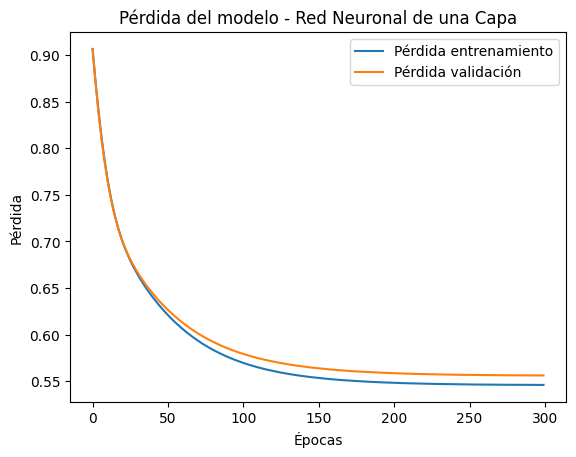

MAE Red de una capa: 0.5560451745986938


In [41]:
# Red Neuronal de una Capa
from keras import backend as K

# Inicialmente se realiza la estandarización de las variables predictoras, de entrenamiento y evaluación.
scaler = StandardScaler()
xTrain_Scaled = scaler.fit_transform(xTrain)
xTest_Scaled = scaler.transform(xTest)

K.clear_session()

# Inicialización del modelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(xTrain.shape[1],), activation='sigmoid'))  # Capa de salida

# Compilación del modelo
model_1.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento del modelo
history_1 = model_1.fit(xTrain, yTrain, epochs=300, validation_data=(xTest, yTest), verbose=0, callbacks=[PlotLossesKeras()])

# Gráfico de la pérdida
plt.plot(history_1.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_1.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo - Red Neuronal de una Capa')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del modelo
mae_1 = model_1.evaluate(xTest, yTest, verbose=0)
print(f'MAE Red de una capa: {mae_1}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.2320 - val_loss: 0.0705 - val_mean_absolute_error: 0.2279
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0638 - mean_absolute_error: 0.2153 - val_loss: 0.0684 - val_mean_absolute_error: 0.2250
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0671 - mean_absolute_error: 0.2238 - val_loss: 0.0663 - val_mean_absolute_error: 0.2219
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0699 - mean_absolute_error: 0.2280 - val_loss: 0.0643 - val_mean_absolute_error: 0.2189
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0652 - mean_absolute_error: 0.2237 - val_loss: 0.0624 - val_mean_absolute_error: 0.2161
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0685 - mean_absolute_error: 0.2279 - val_loss: 0.0606 - val_mean_absolute_error: 0.2134
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0662 - mean_absolute_error: 0.2208 - val

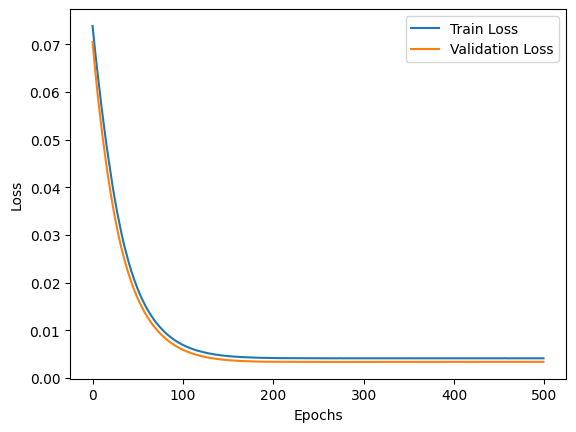

Train MAE: [0.0041292388923466206, 0.04758318141102791], Test MAE: [0.003398237284272909, 0.04398919269442558]
Train MSE: [0.0041292388923466206, 0.04758318141102791], Test MSE: [0.003398237284272909, 0.04398919269442558]


In [37]:
# Importación librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import mean_squared_error
from keras.metrics import mean_absolute_error


# Normalización de variables predictoras (X) con la función StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)

xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

# Definición de la red neuronal de una capa
model = Sequential()
model.add(Dense(1, input_shape=(xTrain.shape[1],), activation='sigmoid'))

# Compilación del modelo
model.compile(optimizer='adam', loss=mean_squared_error, metrics=[mean_absolute_error])

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Entrenamiento del modelo
history = model.fit(xTrain, yTrain, epochs=500, validation_data=(xTest, yTest), verbose=1)

# Gráfica de la pérdida del modelo vs el número de épocas
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Desempeño del modelo
train_mae = model.evaluate(xTrain, yTrain, verbose=0)
test_mae = model.evaluate(xTest, yTest, verbose=0)
train_mse = model.evaluate(xTrain, yTrain, verbose=0)
test_mse = model.evaluate(xTest, yTest, verbose=0)

print(f'Train MAE: {train_mae}, Test MAE: {test_mae}')
print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

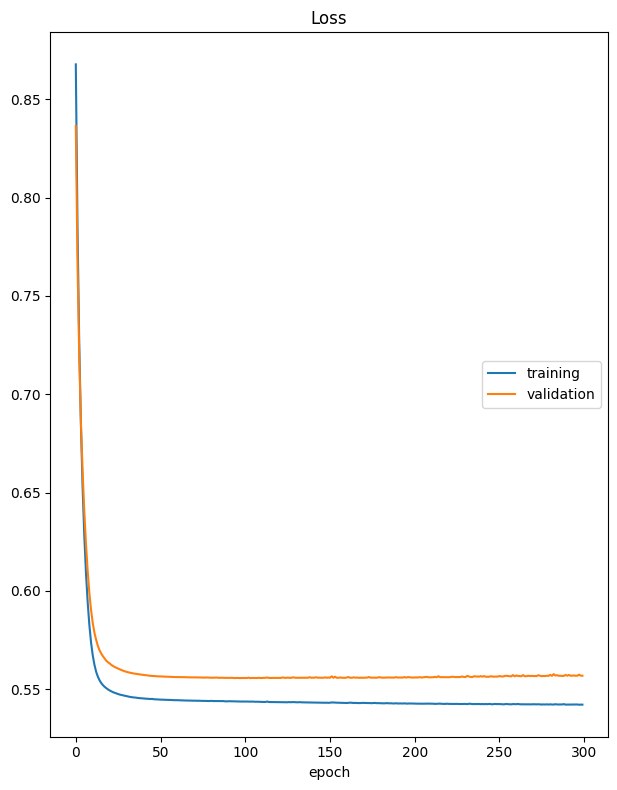

Loss
	training         	 (min:    0.542, max:    0.868, cur:    0.542)
	validation       	 (min:    0.556, max:    0.836, cur:    0.557)


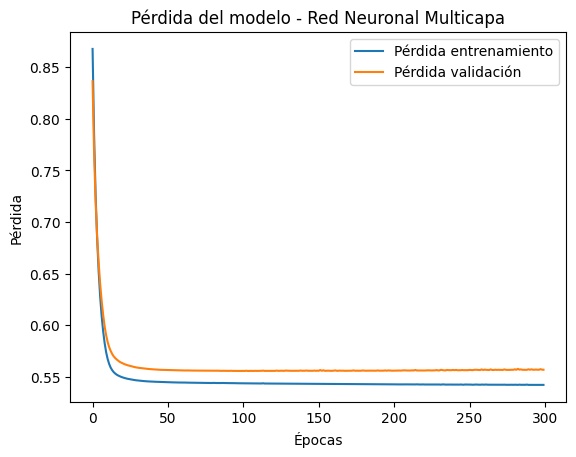

MAE Red multicapa: 0.5568308234214783


In [38]:
# Red Neuronal Multicapa
K.clear_session()

model_2 = Sequential()
model_2.add(Dense(10, input_shape=(xTrain.shape[1],), activation='relu'))  # Capa oculta
model_2.add(Dense(1, activation='sigmoid'))  # Capa de salida

model_2.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenamiento del modelo
history_2 = model_2.fit(xTrain, yTrain, epochs=300, batch_size=10, validation_data=(xTest, yTest), verbose=0, callbacks=[PlotLossesKeras()])

# Gráfico de la pérdida
plt.plot(history_2.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_2.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo - Red Neuronal Multicapa')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del modelo
mae_2 = model_2.evaluate(xTest, yTest, verbose=0)
print(f'MAE Red multicapa: {mae_2}')

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

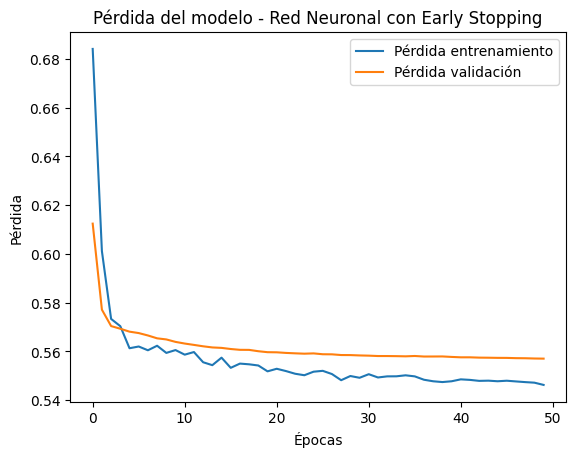

MAE Red multicapa (dropout y early stopping): 0.5570027828216553


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

# Red Neuronal Multicapa con Early Stopping y Dropout
K.clear_session()

model_3 = Sequential()
model_3.add(Dense(20, input_shape=(xTrain.shape[1],), activation='relu'))  # Capa oculta
model_3.add(Dropout(0.2))  # Dropout para prevenir overfitting
model_3.add(Dense(1, activation='sigmoid'))  # Capa de salida

model_3.compile(optimizer='adam', loss='binary_crossentropy')

# Configuración de Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento del modelo
history_3 = model_3.fit(xTrain, yTrain, epochs=50, batch_size=10, validation_data=(xTest, yTest), verbose=0, callbacks=[best_model, early_stop])

# Gráfico de la pérdida
plt.plot(history_3.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_3.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo - Red Neuronal con Early Stopping')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del modelo
mae_3 = model_3.evaluate(xTest, yTest, verbose=0)
print(f'MAE Red multicapa (dropout y early stopping): {mae_3}')

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [40]:
# Celda 4
# Comparación de resultados
print(f'MAE Red de una capa: {mae_1}')
print(f'MAE Red multicapa: {mae_2}')
print(f'MAE Red multicapa (dropout y early stopping): {mae_3}')

# Análisis de resultados
if mae_1 < mae_2 and mae_1 < mae_3:
    print("La red de una capa es la mejor.")
elif mae_2 < mae_1 and mae_2 < mae_3:
    print("La red multicapa es la mejor.")
else:
    print("La red multicapa con dropout y early stopping es la mejor.")

MAE Red de una capa: 0.5777019262313843
MAE Red multicapa: 0.5568308234214783
MAE Red multicapa (dropout y early stopping): 0.5570027828216553
La red multicapa es la mejor.
